In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Описание задачи**

Набор данных «E-commerce Customer Data For Behavior Analysis», представляет собой детализированную модель электронной коммерции. Он включает данные о действиях клиентов и их истории покупок на цифровом рынке. Набор данных идеально подходит для задач, таких как прогнозирование оттока клиентов, анализ потребительских предпочтений, построение рекомендаций и изучение рыночных трендов.

---

Основная задача анализа — предсказать отток клиентов. Это требует решения задачи классификации с двумя возможными исходами:

-Клиент покинул платформу

-Клиент остался

# **Чтение данных**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ecommerce_customer_data_large.csv")
df

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,44605,2023-05-03 21:30:02,Home,177,1,2427,PayPal,31,1.0,John Rivera,31,Female,0
1,44605,2021-05-16 13:57:44,Electronics,174,3,2448,PayPal,31,1.0,John Rivera,31,Female,0
2,44605,2020-07-13 06:16:57,Books,413,1,2345,Credit Card,31,1.0,John Rivera,31,Female,0
3,44605,2023-01-17 13:14:36,Electronics,396,3,937,Cash,31,0.0,John Rivera,31,Female,0
4,44605,2021-05-01 11:29:27,Books,259,4,2598,PayPal,31,1.0,John Rivera,31,Female,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,33807,2023-01-24 12:32:18,Home,436,1,3664,Cash,63,0.0,Gabriel Williams,63,Male,0
249996,20455,2021-06-04 05:45:25,Electronics,233,1,4374,Credit Card,66,1.0,Barry Foster,66,Female,0
249997,28055,2022-11-10 17:11:57,Electronics,441,5,5296,Cash,63,NaN,Lisa Johnson,63,Female,0
249998,15023,2021-06-27 14:42:12,Electronics,44,2,2517,Cash,64,1.0,Melissa Fernandez,64,Male,0


In [ ]:
df.shape  # Размерность датасета

(250000, 13)

In [ ]:
df.head()

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,44605,2023-05-03 21:30:02,Home,177,1,2427,PayPal,31,1.0,John Rivera,31,Female,0
1,44605,2021-05-16 13:57:44,Electronics,174,3,2448,PayPal,31,1.0,John Rivera,31,Female,0
2,44605,2020-07-13 06:16:57,Books,413,1,2345,Credit Card,31,1.0,John Rivera,31,Female,0
3,44605,2023-01-17 13:14:36,Electronics,396,3,937,Cash,31,0.0,John Rivera,31,Female,0
4,44605,2021-05-01 11:29:27,Books,259,4,2598,PayPal,31,1.0,John Rivera,31,Female,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Customer ID            250000 non-null  int64  
 1   Purchase Date          250000 non-null  object 
 2   Product Category       250000 non-null  object 
 3   Product Price          250000 non-null  int64  
 4   Quantity               250000 non-null  int64  
 5   Total Purchase Amount  250000 non-null  int64  
 6   Payment Method         250000 non-null  object 
 7   Customer Age           250000 non-null  int64  
 8   Returns                202618 non-null  float64
 9   Customer Name          250000 non-null  object 
 10  Age                    250000 non-null  int64  
 11  Gender                 250000 non-null  object 
 12  Churn                  250000 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 24.8+ MB


Набор данных включает следующие столбцы:

* Customer ID: уникальный идентификатор клиента.
* Purchase Date: дата каждой покупки, совершенной клиентом.
* Product Category: категория или тип приобретенного продукта.
* Product Price: цена приобретенного продукта.
* Quantity: количество приобретенного товара.
* Total Purchase Amount: общая сумма, потраченная клиентом в каждой транзакции.
* Payment Method: способ оплаты, используемый клиентом.
* Customer Age: возраст клиента (генерируется с помощью Faker).
* Returns: указывает, был ли возврат продукта (бинарный код: 0 — возврат не был произведен, 1 — возврат был произведен).
* Customer Name: имя клиента.
* Age: возраст клиента.
* Gender: пол клиента.
* Churn: бинарный столбец, показывающий, ушел ли клиент (0 — клиент остался, 1 — клиент ушел). Это предсказываемое значение.

Признаки Returns и Churn являются бинарными.

Признаки Gender, Product Category и Payment Method — категориальные (нормализованные).

Признаки Customer ID, Product Price, Quantity, Total Purchase Amount, Customer Age и Age — числовые (непрерывные).

Признак Purchase Date необходимо преобразовать из строкового формата в формат даты и времени.


---


Исключим признаки, которые не влияют на решение клиента о прекращении использования услуг магазина и не должны использоваться для обучения модели: Customer ID и Customer Name. Признаки Age и Customer Age дублируют друг друга, поэтому можно исключить один из них.

Бинарные признаки можно рассматривать как категориальные неупорядоченные или числовые. В данной задаче признаки Returns и Churn будем считать категориальными (возвраты можно разделить на две категории: был возврат или нет. Аналогично с уходом клиента).

In [ ]:
data = df.drop(['Customer ID', 'Customer Name', 'Customer Age'], axis=1)
data['Purchase Date'] = pd.to_datetime(df['Purchase Date'])
data

,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Returns,Age,Gender,Churn
0,2023-05-03 21:30:02,Home,177,1,2427,PayPal,1.0,31,Female,0
1,2021-05-16 13:57:44,Electronics,174,3,2448,PayPal,1.0,31,Female,0
2,2020-07-13 06:16:57,Books,413,1,2345,Credit Card,1.0,31,Female,0
3,2023-01-17 13:14:36,Electronics,396,3,937,Cash,0.0,31,Female,0
4,2021-05-01 11:29:27,Books,259,4,2598,PayPal,1.0,31,Female,0
...,...,...,...,...,...,...,...,...,...,...
249995,2023-01-24 12:32:18,Home,436,1,3664,Cash,0.0,63,Male,0
249996,2021-06-04 05:45:25,Electronics,233,1,4374,Credit Card,1.0,66,Female,0
249997,2022-11-10 17:11:57,Electronics,441,5,5296,Cash,NaN,63,Female,0
249998,2021-06-27 14:42:12,Electronics,44,2,2517,Cash,1.0,64,Male,0


In [ ]:
data['Product Category'] = data['Product Category'].astype('category')
data['Payment Method'] = data['Payment Method'].astype('category')
data['Gender'] = data['Gender'].astype('category')
data['Returns'] = data['Returns'].astype('category')
data['Churn'] = data['Churn'].astype('category')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Purchase Date          250000 non-null  datetime64[ns]
 1   Product Category       250000 non-null  category      
 2   Product Price          250000 non-null  int64         
 3   Quantity               250000 non-null  int64         
 4   Total Purchase Amount  250000 non-null  int64         
 5   Payment Method         250000 non-null  category      
 6   Returns                202618 non-null  category      
 7   Age                    250000 non-null  int64         
 8   Gender                 250000 non-null  category      
 9   Churn                  250000 non-null  category      
dtypes: category(5), datetime64[ns](1), int64(4)
memory usage: 10.7 MB


# **Основные характеристики и визуализация данных**

In [ ]:
data.describe(include=['int64'])

,Product Price,Quantity,Total Purchase Amount,Age
count,250000.000000,250000.000000,250000.000000,250000.000000
mean,254.742724,3.004936,2725.385196,43.798276
std,141.738104,1.414737,1442.576095,15.364915
min,10.000000,1.000000,100.000000,18.000000
25%,132.000000,2.000000,1476.000000,30.000000
50%,255.000000,3.000000,2725.000000,44.000000
75%,377.000000,4.000000,3975.000000,57.000000
max,500.000000,5.000000,5350.000000,70.000000



min – минимальное значение признака

max – максимальное значение признака

mean – среднее значение

std – среднеквадратическое отклонение

25% – первый квартиль – значение, ниже которого лежит 25% значений

50% – медиана – значение, 50% значений меньше которого, а другие 50% больше

75% – третий квартиль – значение, ниже которого лежит около 75% значений

---

Построим корреляционную матрицу


In [ ]:
corrMatrix = data.select_dtypes(include=['int64']).corr()
corrMatrix.style.background_gradient(cmap='Blues', vmin=-1, vmax=1)

,Product Price,Quantity,Total Purchase Amount,Age
Product Price,1.000000,0.002339,-0.001297,0.002214
Quantity,0.002339,1.000000,0.001234,-0.000180
Total Purchase Amount,-0.001297,0.001234,1.000000,0.056552
Age,0.002214,-0.000180,0.056552,1.000000


Интересно отметить, что цена продукта не коррелирует с общей суммой покупки, а количество приобретенного товара не связано с итоговой стоимостью. Напротив, наиболее сильная корреляция наблюдается между возрастом клиента и итоговой стоимостью.

Это указывает на возможную ненадежность данных. Вероятно, ошибка возникла в процессе их некорректного формирования.


---

**Категориальные бинарные признаки**



* unique: количество уникальных значений в признаке.
* top: наиболее часто встречающееся значение.
* freq: частота появления наиболее распространенного значения.

Из анализа видно, что существует 4 уникальные категории продуктов и 3 уникальные категории методов оплаты.

  *Наиболее популярная категория продуктов — электроника.*

  *Наиболее распространенный метод оплаты — оплата по кредитной карте.*

Большинство покупателей — мужчины, но их количество лишь незначительно превышает количество женщин. Соотношение почти 50 на 50.

Возвраты товаров и отток клиентов являются наиболее распространенными событиями.

  *Хотя возвратов было сделано менее половины (около 40%), отток клиентов составляет около 80%.*

Также стоит отметить наличие пропущенных значений в признаке Returns.



In [ ]:
data.describe(include=['category'])

,Product Category,Payment Method,Returns,Gender,Churn
count,250000,250000,202618.0,250000,250000
unique,4,3,2.0,2,2
top,Electronics,Credit Card,1.0,Male,0
freq,62630,83547,101476.0,125676,199870


**Визуализация**

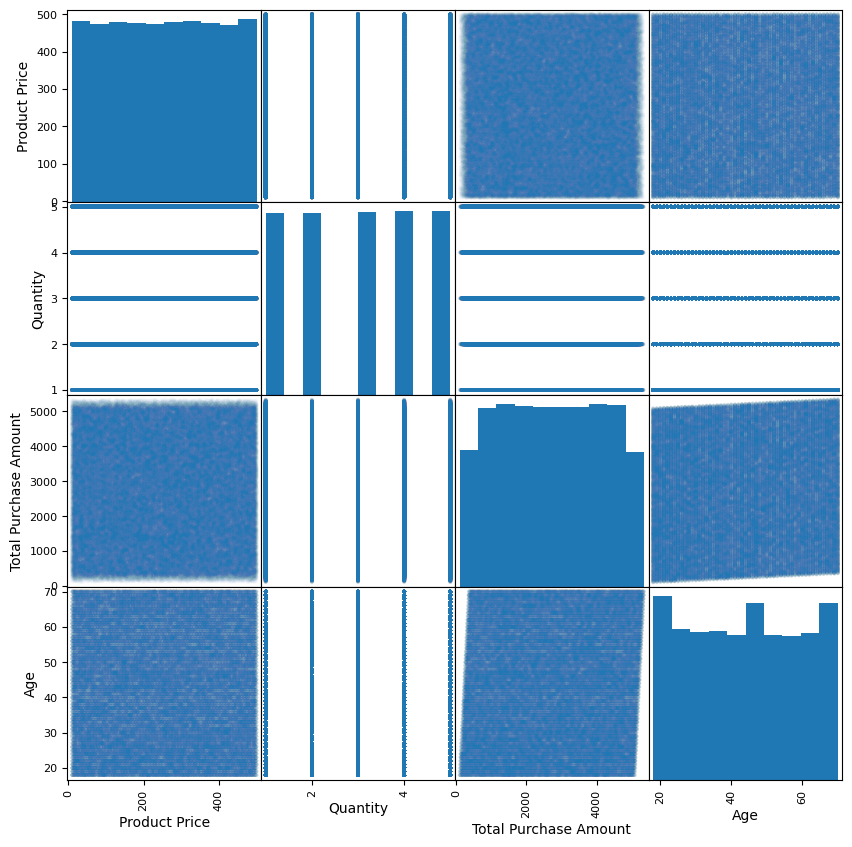

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha = .01, figsize = (10, 10))
pass

array([[<Axes: title={'center': 'Purchase Date'}>,
        <Axes: title={'center': 'Product Price'}>,
        <Axes: title={'center': 'Quantity'}>],
       [<Axes: title={'center': 'Total Purchase Amount'}>,
        <Axes: title={'center': 'Age'}>, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >]], dtype=object)

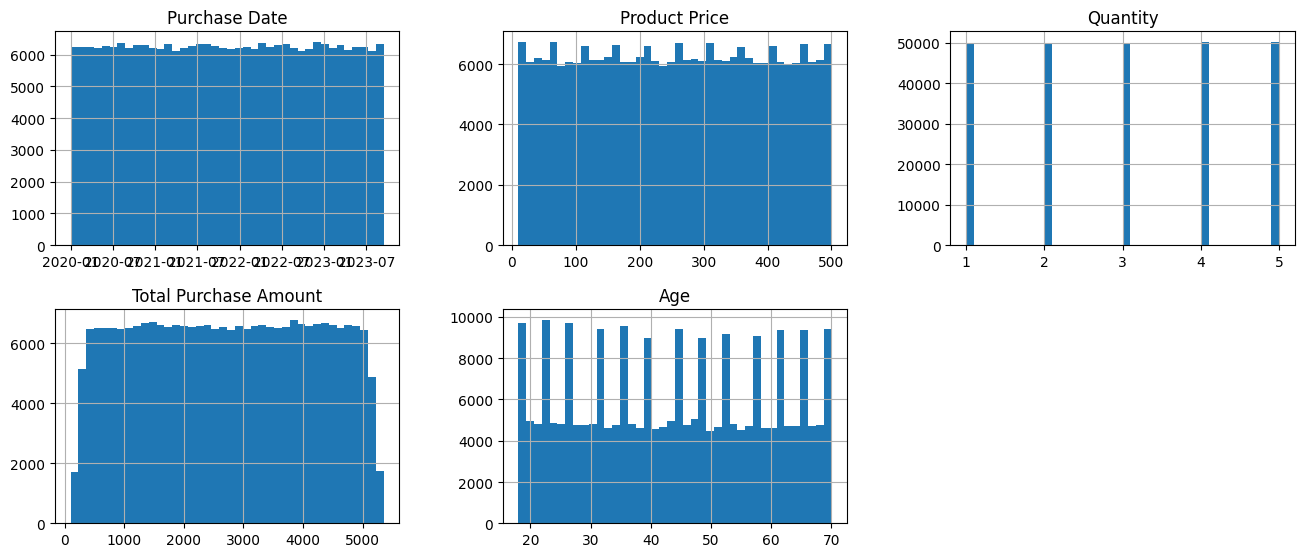

In [ ]:
data.hist(bins=40, layout=(3,3), figsize=(16,10))

# **Обработка пропущенных значений**

Одним из эффективных и простых способов обработки данных является замена пропущенных значений в количественных переменных на среднее или медианное значение. В случае категориальных признаков, пропущенные значения можно заполнить наиболее часто встречающимся значением в соответствующем столбце.

In [ ]:
data.isnull().sum() # убедились, что пропущенные значения есть только у категориального признака Returns

,0
Purchase Date,0
Product Category,0
Product Price,0
Quantity,0
Total Purchase Amount,0
Payment Method,0
Returns,47382
Age,0
Gender,0
Churn,0


In [ ]:
data['Returns'].describe()

,Returns
count,202618.0
unique,2.0
top,1.0
freq,101476.0


In [ ]:
data['Returns'] = data['Returns'].fillna(1.0)
data['Returns'].describe()

,Returns
count,250000.0
unique,2.0
top,1.0
freq,148858.0


# **Обработка критериальных данных**



In [ ]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(drop='if_binary', sparse_output=False)
enc.fit(data[['Product Category',	'Payment Method', 'Gender', 'Returns', 'Churn']])

dummies = pd.DataFrame(enc.transform(data[['Product Category',	'Payment Method', 'Gender', 'Returns', 'Churn']]),
                       columns=enc.get_feature_names_out(), index=data.index)

In [ ]:
data1 = pd.concat((data, dummies), axis=1).drop(['Product Category',	'Payment Method', 'Gender', 'Returns', 'Churn'], axis=1)
data1

,Purchase Date,Product Price,Quantity,Total Purchase Amount,Age,Product Category_Books,Product Category_Clothing,Product Category_Electronics,Product Category_Home,Payment Method_Cash,Payment Method_Credit Card,Payment Method_PayPal,Gender_Male,Returns_1.0,Churn_1
0,2023-05-03 21:30:02,177,1,2427,31,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,2021-05-16 13:57:44,174,3,2448,31,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,2020-07-13 06:16:57,413,1,2345,31,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,2023-01-17 13:14:36,396,3,937,31,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,2021-05-01 11:29:27,259,4,2598,31,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,2023-01-24 12:32:18,436,1,3664,63,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
249996,2021-06-04 05:45:25,233,1,4374,66,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
249997,2022-11-10 17:11:57,441,5,5296,63,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
249998,2021-06-27 14:42:12,44,2,2517,64,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 15 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   Purchase Date                 250000 non-null  datetime64[ns]
 1   Product Price                 250000 non-null  int64         
 2   Quantity                      250000 non-null  int64         
 3   Total Purchase Amount         250000 non-null  int64         
 4   Age                           250000 non-null  int64         
 5   Product Category_Books        250000 non-null  float64       
 6   Product Category_Clothing     250000 non-null  float64       
 7   Product Category_Electronics  250000 non-null  float64       
 8   Product Category_Home         250000 non-null  float64       
 9   Payment Method_Cash           250000 non-null  float64       
 10  Payment Method_Credit Card    250000 non-null  float64       
 11  Payment Metho

# **Нормализация**

Проведем нормализацию, чтобы все переменные были в диапазоне от 0 до 1

In [ ]:
cols_to_norm = ['Product Price',	'Quantity',	'Total Purchase Amount',	'Age']
data_numerical = data[cols_to_norm]
data_numerical.describe()

,Product Price,Quantity,Total Purchase Amount,Age
count,250000.000000,250000.000000,250000.000000,250000.000000
mean,254.742724,3.004936,2725.385196,43.798276
std,141.738104,1.414737,1442.576095,15.364915
min,10.000000,1.000000,100.000000,18.000000
25%,132.000000,2.000000,1476.000000,30.000000
50%,255.000000,3.000000,2725.000000,44.000000
75%,377.000000,4.000000,3975.000000,57.000000
max,500.000000,5.000000,5350.000000,70.000000


In [ ]:
data_numerical = (data_numerical - data_numerical.min(axis = 0))/(data_numerical.max(axis = 0) - data_numerical.min(axis = 0))
data_numerical.describe()

,Product Price,Quantity,Total Purchase Amount,Age
count,250000.000000,250000.000000,250000.000000,250000.000000
mean,0.499475,0.501234,0.500073,0.496121
std,0.289261,0.353684,0.274776,0.295479
min,0.000000,0.000000,0.000000,0.000000
25%,0.248980,0.250000,0.262095,0.230769
50%,0.500000,0.500000,0.500000,0.500000
75%,0.748980,0.750000,0.738095,0.750000
max,1.000000,1.000000,1.000000,1.000000


In [ ]:
data_numerical

,Product Price,Quantity,Total Purchase Amount,Age
0,0.340816,0.00,0.443238,0.250000
1,0.334694,0.50,0.447238,0.250000
2,0.822449,0.00,0.427619,0.250000
3,0.787755,0.50,0.159429,0.250000
4,0.508163,0.75,0.475810,0.250000
...,...,...,...,...
249995,0.869388,0.00,0.678857,0.865385
249996,0.455102,0.00,0.814095,0.923077
249997,0.879592,1.00,0.989714,0.865385
249998,0.069388,0.25,0.460381,0.884615


При использовании классификатора ближайших соседей (k-NN) важно помнить, что различные атрибуты могут иметь разные диапазоны значений в выборке. Это может привести к тому, что расстояния между объектами будут в значительной степени зависеть от атрибутов с более широкими диапазонами. Поэтому данные обычно нуждаются в нормализации.

Однако, учитывая размер исходного датасета (250 000 строк) и необходимость хранить обучающую выборку при использовании k-NN, было решено применить случайный лес.


# **Разбиение на две выборки**

*Обучающая и тестовая*

In [ ]:
from sklearn.model_selection import train_test_split

data1['Purchase Date'] = data1['Purchase Date'].astype('int64') / 10**9

y = data1['Churn_1']
data1 = data1.drop(columns=['Churn_1'])
X_train, X_test, y_train, y_test = train_test_split(data1, y, test_size = 0.20, random_state = 56)

N_train, _ = X_train.shape
N_test,  _ = X_test.shape

N_train, N_test       #количество строк в обучающей и тестовой выборках

(200000, 50000)

Обучающая выборка - 80%
Тестовая выборка - 20%

# **Классификатор** *Случайный лес*

В качестве классификатора был выбран случайный лес благодаря его высокой точности, устойчивости к переобучению и способности эффективно обрабатывать большие объемы данных. Несмотря на эти преимущества, время работы классификатора все же оказалось достаточно продолжительным.

In [ ]:
from sklearn import ensemble
from sklearn.model_selection import GridSearchCV
rf = ensemble.RandomForestClassifier(n_estimators = 1000)

grid = GridSearchCV(rf, cv=10, param_grid = {'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9]},scoring='roc_auc')
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(n_estimators=1000),
             param_grid={'max_depth': [3, 6, 9], 'max_leaf_nodes': [3, 6, 9]},
             scoring='roc_auc')

**Выбор оптимального значения гиперпараметра**

In [ ]:
depth= grid.best_estimator_.max_depth
max_leaf_nodes= grid.best_estimator_.max_leaf_nodes
print(depth, max_leaf_nodes)

6 6


**Обучение модели**

In [ ]:
rfst = ensemble.RandomForestClassifier(max_depth = depth,max_leaf_nodes = max_leaf_nodes,n_estimators = 300)
rfst.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, max_leaf_nodes=6, n_estimators=300)

**Вычисление ошибки на обучающей и тестовой выборке**

In [ ]:
err_train = np.mean(y_train != rfst.predict(X_train))
err_test  = np.mean(y_test  != rfst.predict(X_test))

print(err_train, err_test)

0.200625 0.2001


# **Выводы**

В связи с дисбалансом классов в нашем датасете, где преобладают удержанные клиенты над ушедшими (80% против 20%), возникла проблема. Из-за малого количества ушедших покупателей в обучающей выборке, наша модель не смогла эффективно определять ушедших клиентов. В результате мы получили константную модель, которая присваивала всем объектам значение 0.

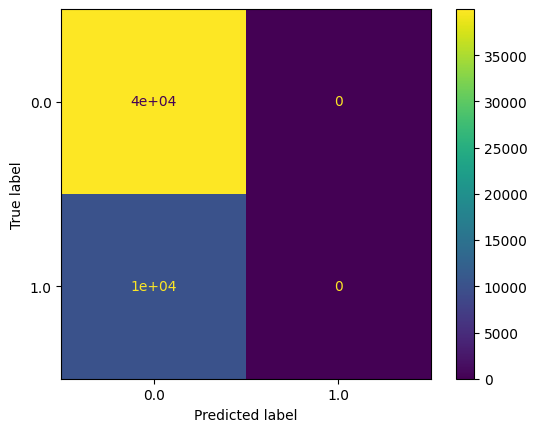

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, rfst.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = rfst.classes_)
disp.plot()
plt.show()